In [1]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, GlobalAveragePooling2D, UpSampling2D

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
input_shape = (32, 32, 3)
batch_size = 128
num_classes = 10
epochs = 5

In [4]:
# Preprocess the data
# Normalize all image data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding for the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

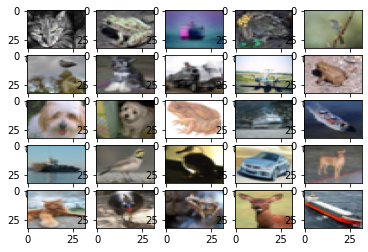

In [5]:
# Visualize data by plotting images
fig, ax = plt.subplots(5, 5)

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(random.choice(x_train), aspect='auto')

plt.show()

In [6]:
# Load the ResNet50 model which is trained on ImageNet dataset.
# Then set the model for training for CIFAR-10 dataset.

ResNet50_MODEL = tf.keras.applications.ResNet50(include_top=False,
                                                input_shape=(224, 224, 3),
                                                weights='imagenet')
ResNet50_ED = tf.keras.Sequential([
    keras.Input(input_shape)])

ResNet50_ED.add(UpSampling2D(size=(7,7)))

ResNet50_ED.add(ResNet50_MODEL)

ResNet50_ED.add(GlobalAveragePooling2D())

ResNet50_ED.add(Dense(1024))
ResNet50_ED.add(Activation("relu"))

ResNet50_ED.add(Dense(512))
ResNet50_ED.add(Activation("relu"))

ResNet50_ED.add(Dense(num_classes))
ResNet50_ED.add(Activation("softmax"))

ResNet50_ED.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                         

In [7]:
ResNet50_ED.compile(optimizer="SGD", 
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

history = ResNet50_ED.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 464s 1s/step - loss: 0.6477 - accuracy: 0.7906 - val_loss: 2.9633 - val_accuracy: 0.1148
Epoch 2/5
352/352 [==============================] - 446s 1s/step - loss: 0.1891 - accuracy: 0.9374 - val_loss: 1.9757 - val_accuracy: 0.3900
Epoch 3/5
352/352 [==============================] - 454s 1s/step - loss: 0.0845 - accuracy: 0.9749 - val_loss: 0.3327 - val_accuracy: 0.8936
Epoch 4/5
352/352 [==============================] - 446s 1s/step - loss: 0.0371 - accuracy: 0.9914 - val_loss: 0.2455 - val_accuracy: 0.9272
Epoch 5/5
352/352 [==============================] - 447s 1s/step - loss: 0.0170 - accuracy: 0.9975 - val_loss: 0.2435 - val_accuracy: 0.9312


In [8]:
test_loss, test_acc = ResNet50_ED.evaluate(x_test, y_test)

313/313 [==============================] - 28s 88ms/step - loss: 0.2394 - accuracy: 0.9300


In [9]:
# Get predictions for test data and custom data.
# Decode one-hot groundtruth labels and predicted labels for test data and custom data.
test_predictions = ResNet50_ED.predict(x_test)

groundtruth_test_labels = tf.argmax(y_test, axis=1)

predicted_test_labels = tf.argmax(test_predictions, axis=1)

In [10]:
 # Print confusion matrices.
confusion_matrix_test = confusion_matrix(groundtruth_test_labels,predicted_test_labels)
print("confusion_matrix_test")
print(confusion_matrix_test)

confusion_matrix_test
[[962   3   2   2   4   1   0   1  21   4]
 [  3 961   0   1   0   0   2   1   4  28]
 [ 19   0 899  18  30  14  14   5   1   0]
 [  4   0  13 811  12 124  21   9   2   4]
 [  2   0  14  17 926  10   8  21   2   0]
 [  3   0   5  47  13 917   4  11   0   0]
 [  7   0   7  15   9   7 953   2   0   0]
 [  5   0   4   6  18   9   1 957   0   0]
 [ 25   5   1   2   0   1   1   1 958   6]
 [  9  26   1   0   0   0   0   1   7 956]]
